In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm

In [2]:
sns.set_style("ticks")
sns.set_context("paper", 1.5, {"lines.linewidth": 2})

In [29]:
epoch = 40
env_name = 'walker2d'
rtg_state_action = 'action'

cka_diag_gpt2 = np.diag(np.load(f'results/cka_unbiased_0_{epoch}_gpt2gpt2_{env_name}_medium_666_{rtg_state_action}.npy'))
cka_diag_igpt = np.diag(np.load(f'results/cka_unbiased_0_{epoch}_igptigpt_{env_name}_medium_666_{rtg_state_action}.npy'))
cka_diag_dt = np.diag(np.load(f'results/cka_unbiased_0_{epoch}_dtdt_{env_name}_medium_666_{rtg_state_action}.npy'))

In [14]:
block_name_list = [
    'ln_1',
    'attn.c_attn',
    'attn.c_proj',
    'attn.resid_dropout',
    'ln_2',
    'mlp.c_fc',
    'mlp.c_proj',
    'mlp.act',
    'mlp.dropout'
]
layer_name_list = []
for i in range(12):
    for block_name in block_name_list:
        layer_name_list.append(str(i) + '.' + block_name)
large_idx = list(np.where(cka_diag_dt > 0.23)[0])

for layer in large_idx:
    print(layer_name_list[layer])

0.ln_1
0.attn.c_attn
0.ln_2
1.ln_1
1.ln_2
2.ln_1
2.attn.c_attn
2.ln_2
3.ln_1
3.attn.c_attn
3.ln_2
4.ln_1
4.ln_2
5.ln_1
5.attn.c_attn
5.ln_2
5.mlp.c_fc
6.ln_1
6.ln_2
7.ln_1
7.ln_2
8.ln_1
8.ln_2
9.ln_1
9.ln_2
10.ln_1
10.attn.c_attn
10.ln_2
10.mlp.c_fc
11.ln_1
11.ln_2


In [15]:
cka_diag_igpt_normalized = []
for i in range(len(cka_diag_igpt)//2):
    cka_diag_igpt_normalized.append(cka_diag_igpt[i * 2: (i + 1) * 2].mean())

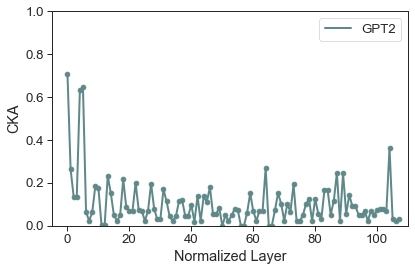

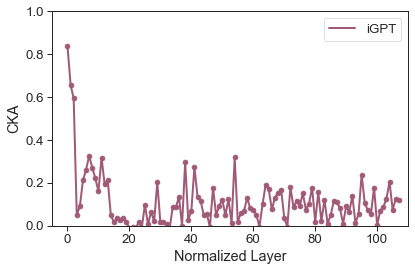

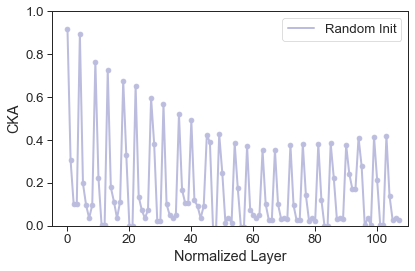

In [16]:
plt.plot(cka_diag_gpt2, color=(0.372, 0.537, 0.537), label='GPT2')
plt.scatter(np.arange(len(cka_diag_gpt2)), cka_diag_gpt2, color=(0.372, 0.537, 0.537))

plt.ylim(0, 1)
plt.xlim(-5, 110)

plt.xlabel('Normalized Layer')
plt.ylabel('CKA')
# plt.title(f'CKA per Layer')
plt.legend()
plt.tight_layout()
plt.savefig(f'figs/cka_unbiased_plot_{epoch}_gpt2_{env_name}_medium_666_{rtg_state_action}.pdf')
plt.show()


plt.plot(cka_diag_igpt_normalized, color=(0.627, 0.352, 0.470), label='iGPT')
plt.scatter(np.arange(len(cka_diag_igpt_normalized)), cka_diag_igpt_normalized, color=(0.627, 0.352, 0.470))

plt.ylim(0, 1)
plt.xlim(-5, 110)

plt.xlabel('Normalized Layer')
plt.ylabel('CKA')
# plt.title(f'CKA per Layer')
plt.legend()
plt.tight_layout()
plt.savefig(f'figs/cka_unbiased_plot_{epoch}_igpt_{env_name}_medium_666_{rtg_state_action}.pdf')
plt.show()


plt.plot(cka_diag_dt, color=(0.733, 0.737, 0.870), label='Random Init')
plt.scatter(np.arange(len(cka_diag_dt)), cka_diag_dt, color=(0.733, 0.737, 0.870))

if env_name == 'hopper' and rtg_state_action == 'state':
    plt.hlines(y=0.23, xmin=-5, xmax=110, color='gray', linestyles='dashed', alpha=0.5)

plt.ylim(0, 1)
plt.xlim(-5, 110)

plt.xlabel('Normalized Layer')
plt.ylabel('CKA')
# plt.title(f'CKA per Layer')
plt.legend()
plt.tight_layout()
plt.savefig(f'figs/cka_unbiased_plot_{epoch}_dt_{env_name}_medium_666_{rtg_state_action}.pdf')
plt.show()

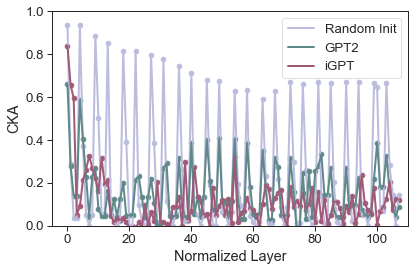

In [30]:
plt.plot(cka_diag_dt, color=(0.733, 0.737, 0.870), label='Random Init')
plt.scatter(np.arange(len(cka_diag_dt)), cka_diag_dt, color=(0.733, 0.737, 0.870))

if env_name == 'hopper' and rtg_state_action == 'state':
    plt.hlines(y=0.23, xmin=-5, xmax=110, color='gray', linestyles='dashed', alpha=0.5)

plt.plot(cka_diag_gpt2, color=(0.372, 0.537, 0.537), label='GPT2')
plt.scatter(np.arange(len(cka_diag_gpt2)), cka_diag_gpt2, color=(0.372, 0.537, 0.537))

plt.plot(cka_diag_igpt_normalized, color=(0.627, 0.352, 0.470), label='iGPT')
plt.scatter(np.arange(len(cka_diag_igpt_normalized)), cka_diag_igpt_normalized, color=(0.627, 0.352, 0.470))

if env_name == 'hopper' and rtg_state_action == 'state':
    plt.hlines(y=0.23, xmin=-5, xmax=110, color='gray', linestyles='dashed', alpha=0.5)

plt.ylim(0, 1)
plt.xlim(-5, 110)

plt.xlabel('Normalized Layer')
plt.ylabel('CKA')
# plt.title(f'CKA per Layer')
plt.legend(loc='upper right')
plt.tight_layout()
plt.savefig(f'figs/cka_unbiased_plot_{epoch}_gpt2_igpt_dt_{env_name}_medium_666_{rtg_state_action}.pdf')
plt.show()

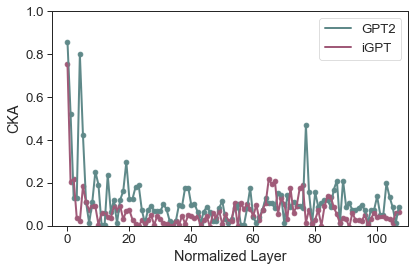

In [47]:
plt.plot(cka_diag_gpt2, color=(0.372, 0.537, 0.537), label='GPT2')
plt.scatter(np.arange(len(cka_diag_gpt2)), cka_diag_gpt2, color=(0.372, 0.537, 0.537))

plt.plot(cka_diag_igpt_normalized, color=(0.627, 0.352, 0.470), label='iGPT')
plt.scatter(np.arange(len(cka_diag_igpt_normalized)), cka_diag_igpt_normalized, color=(0.627, 0.352, 0.470))

plt.ylim(0, 1)
plt.xlim(-5, 110)

plt.xlabel('Normalized Layer')
plt.ylabel('CKA')
# plt.title(f'CKA per Layer')
plt.legend()
plt.tight_layout()
plt.savefig(f'figs/cka_unbiased_plot_{epoch}_gpt2_igpt_{env_name}_medium_666_{rtg_state_action}.pdf')
plt.show()

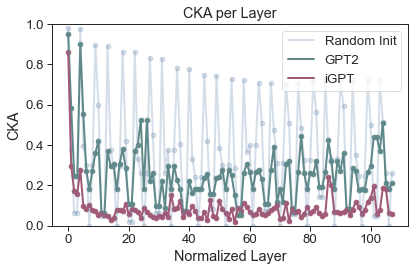

In [94]:
plt.plot(cka_diag_dt, color=(0.450, 0.576, 0.701), label='Random Init', alpha=0.3)
plt.scatter(np.arange(len(cka_diag_dt)), cka_diag_dt, color=(0.450, 0.576, 0.701), alpha=0.3)

plt.plot(cka_diag_gpt2, color=(0.372, 0.537, 0.537), label='GPT2')
plt.scatter(np.arange(len(cka_diag_gpt2)), cka_diag_gpt2, color=(0.372, 0.537, 0.537))

plt.plot(cka_diag_igpt_normalized, color=(0.627, 0.352, 0.470), label='iGPT')
plt.scatter(np.arange(len(cka_diag_igpt_normalized)), cka_diag_igpt_normalized, color=(0.627, 0.352, 0.470))

plt.ylim(0, 1)

plt.xlabel('Normalized Layer')
plt.ylabel('CKA')
plt.title(f'CKA per Layer')
plt.legend()
plt.tight_layout()
plt.savefig(f'figs/cka_plot_{epoch}_gpt2_igpt_dt_{env_name}_medium_666_{rtg_state_action}.pdf')
plt.show()

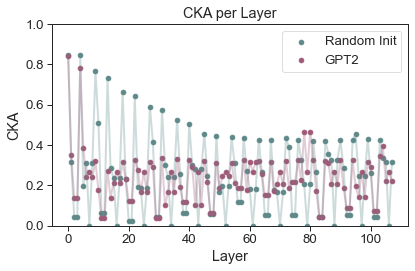

In [30]:
plt.plot(cka_diag_dt, color=(0.372, 0.537, 0.537), alpha=0.3)
plt.plot(cka_diag_gpt2, color=(0.627, 0.352, 0.470), alpha=0.3)
plt.scatter(np.arange(len(cka_diag_dt)), cka_diag_dt, color=(0.372, 0.537, 0.537), label='Random Init')
plt.scatter(np.arange(len(cka_diag_gpt2)), cka_diag_gpt2, color=(0.627, 0.352, 0.470), label='GPT2')

plt.ylim(0, 1)

plt.xlabel('Layer')
plt.ylabel('CKA')
plt.title(f'CKA per Layer')
plt.legend()
plt.tight_layout()
plt.savefig(f'figs/cka_plot_{epoch}_dt_gpt2_{env_name}_medium_666_{rtg_state_action}.pdf')
plt.show()

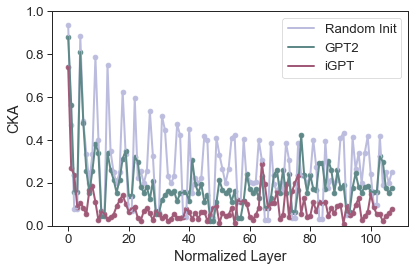

In [7]:
plt.plot(cka_diag_dt, color=(0.733, 0.737, 0.870), label='Random Init')
plt.scatter(np.arange(len(cka_diag_dt)), cka_diag_dt, color=(0.733, 0.737, 0.870))

plt.plot(cka_diag_gpt2, color=(0.372, 0.537, 0.537), label='GPT2')
plt.scatter(np.arange(len(cka_diag_gpt2)), cka_diag_gpt2, color=(0.372, 0.537, 0.537))

plt.plot(cka_diag_igpt_normalized, color=(0.627, 0.352, 0.470), label='iGPT')
plt.scatter(np.arange(len(cka_diag_igpt_normalized)), cka_diag_igpt_normalized, color=(0.627, 0.352, 0.470))

plt.ylim(0, 1)

plt.xlabel('Normalized Layer')
plt.ylabel('CKA')
# plt.title(f'CKA per Layer')
plt.legend()
plt.tight_layout()
plt.savefig(f'figs/cka_plot_{epoch}_gpt2_igpt_dt_{env_name}_medium_666_{rtg_state_action}.pdf')
plt.show()

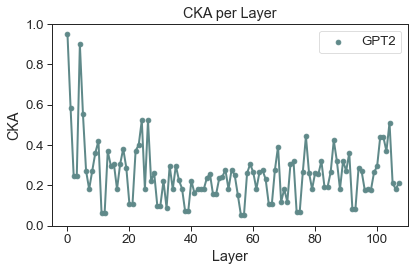

In [22]:
plt.plot(cka_diag_gpt2, color=(0.372, 0.537, 0.537))
plt.scatter(np.arange(len(cka_diag_gpt2)), cka_diag_gpt2, color=(0.372, 0.537, 0.537), label='GPT2')

plt.ylim(0, 1)
plt.xlim(-5, 110)

plt.xlabel('Layer')
plt.ylabel('CKA')
plt.title(f'CKA per Layer')
plt.legend()
plt.tight_layout()
plt.savefig(f'figs/cka_plot_{epoch}_gpt2_{env_name}_medium_666.pdf')
plt.show()

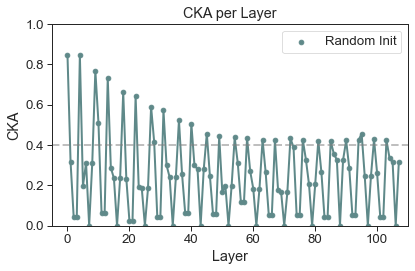

In [28]:
plt.plot(cka_diag_dt, color=(0.372, 0.537, 0.537))
plt.scatter(np.arange(len(cka_diag_dt)), cka_diag_dt, color=(0.372, 0.537, 0.537), label='Random Init')

plt.hlines(y=0.4, xmin=-5, xmax=110, color='gray', linestyles='dashed', alpha=0.5)

plt.ylim(0, 1)
plt.xlim(-5, 110)

plt.xlabel('Layer')
plt.ylabel('CKA')
plt.title(f'CKA per Layer')
plt.legend()
plt.tight_layout()
plt.savefig(f'figs/cka_plot_{epoch}_dt_{env_name}_medium_666.pdf')
plt.show()

In [21]:
block_name_list = [
    'ln_1',
    'attn.c_attn',
    'attn.c_proj',
    'attn.resid_dropout',
    'ln_2',
    'mlp.c_fc',
    'mlp.c_proj',
    'mlp.act',
    'mlp.dropout'
]
layer_name_list = []
for i in range(12):
    for block_name in block_name_list:
        layer_name_list.append(str(i) + '.' + block_name)
large_idx = list(np.where(cka_diag_dt > 0.4)[0])

for layer in large_idx:
    print(layer_name_list[layer])

0.ln_1
0.attn.c_attn
0.ln_2
0.mlp.c_fc
1.ln_1
1.attn.c_attn
1.ln_2
2.ln_1
2.ln_2
3.ln_1
3.ln_2
3.mlp.c_fc
4.ln_1
4.attn.c_attn
4.ln_2
5.ln_1
5.attn.c_attn
5.ln_2
6.ln_1
6.attn.c_attn
6.ln_2
9.ln_1
10.ln_1
10.attn.c_attn
10.ln_2
11.ln_1
11.ln_2


# 各時刻

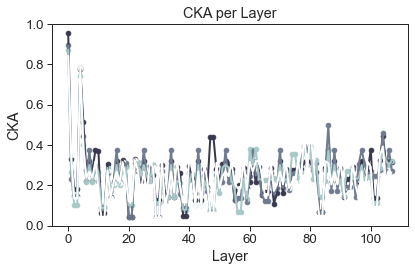

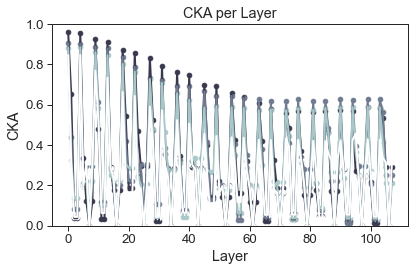

In [50]:
epochs = [10, 20, 30, 40]


for epoch in epochs:

    cka_diag_gpt2 = np.diag(np.load(f'results/cka_0_{epoch}_gpt2gpt2_hopper_medium_666_action.npy'))
    plt.plot(cka_diag_gpt2, color=cm.bone(epoch//10 / len(epochs)))
    plt.scatter(np.arange(len(cka_diag_gpt2)), cka_diag_gpt2, color=cm.bone(epoch//10 / len(epochs)))

plt.ylim(0, 1)
plt.xlabel('Layer')
plt.ylabel('CKA')
plt.title(f'CKA per Layer')
# plt.legend()
plt.tight_layout()
plt.savefig(f'figs/cka_plot_epochs_gpt2_hopper_medium_666.pdf')
plt.show()

for epoch in epochs:

    cka_diag_dt = np.diag(np.load(f'results/cka_0_{epoch}_dtdt_hopper_medium_666_action.npy'))
    plt.plot(cka_diag_dt, color=cm.bone(epoch//10 / len(epochs)))
    plt.scatter(np.arange(len(cka_diag_dt)), cka_diag_dt, color=cm.bone(epoch//10 / len(epochs)))

plt.ylim(0, 1)
plt.xlabel('Layer')
plt.ylabel('CKA')
plt.title(f'CKA per Layer')
# plt.legend()
plt.tight_layout()
plt.savefig(f'figs/cka_plot_epochs_dt_hopper_medium_666.pdf')
plt.show()